In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
import pickle

In [3]:
f_data = pd.read_csv('FlightDelays.csv')

In [4]:
f_data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01-01-2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01-01-2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01-01-2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01-01-2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01-01-2004,7814,IAD,0,4,1,N685BR,ontime


In [5]:
# rename the column name
f_data=f_data.rename(columns={"Flight_Status": "FLIGHT_STATUS"})

In [6]:
# Check if there are any null values in the dataframe
f_data.isnull().any()

CRS_DEP_TIME     False
CARRIER          False
DEP_TIME         False
DEST             False
DISTANCE         False
FL_DATE          False
FL_NUM           False
ORIGIN           False
Weather          False
DAY_WEEK         False
DAY_OF_MONTH     False
TAIL_NUM         False
FLIGHT_STATUS    False
dtype: bool

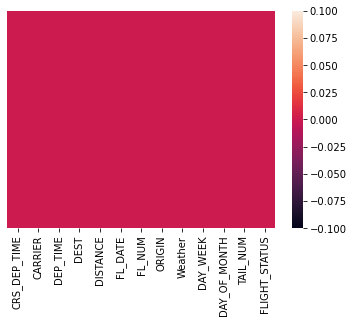

In [7]:
#Check for null values in the dataset
sns.heatmap(f_data.isnull(), yticklabels=False)
plt.show()

In [8]:
# check the data types of all the columns before modeling
print(f_data.dtypes)

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
FLIGHT_STATUS    object
dtype: object


In [9]:
f_data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01-01-2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01-01-2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01-01-2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01-01-2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01-01-2004,7814,IAD,0,4,1,N685BR,ontime


In [10]:
print(f_data.columns)
len(f_data.columns)

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'FLIGHT_STATUS'],
      dtype='object')


13

In [30]:
#converting the object type(String type) to categorical data

from collections import defaultdict
d = defaultdict(LabelEncoder)

#selecting cols that need to be transformed
df = pd.DataFrame(f_data, columns = ['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN','TAIL_NUM','FLIGHT_STATUS'])

# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
flights_df=pd.DataFrame(df.apply(lambda x: d[x.name].transform(x)))

#add the rest of the cols to the dataframe
flights_df['CRS_DEP_TIME']=f_data['CRS_DEP_TIME']
flights_df['DEP_TIME']=f_data['DEP_TIME']
flights_df['DISTANCE']=f_data['DISTANCE']
flights_df['FL_NUM']=f_data['FL_NUM']
flights_df['Weather']=f_data['Weather']
flights_df['DAY_WEEK']=f_data['DAY_WEEK']
flights_df['DAY_OF_MONTH']=f_data['DAY_OF_MONTH']

#print top 5 values of the dataset
flights_df.head()

,CARRIER,DEST,FL_DATE,ORIGIN,TAIL_NUM,FLIGHT_STATUS,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
0,4,1,0,0,525,1,1455,1455,184,5935,0,4,1
1,1,1,0,1,262,1,1640,1640,213,6155,0,4,1
2,1,2,0,2,381,1,1245,1245,229,7208,0,4,1
3,1,2,0,2,349,1,1715,1709,229,7215,0,4,1
4,1,2,0,2,384,1,1039,1035,229,7792,0,4,1


# Exploratory Data Analysis

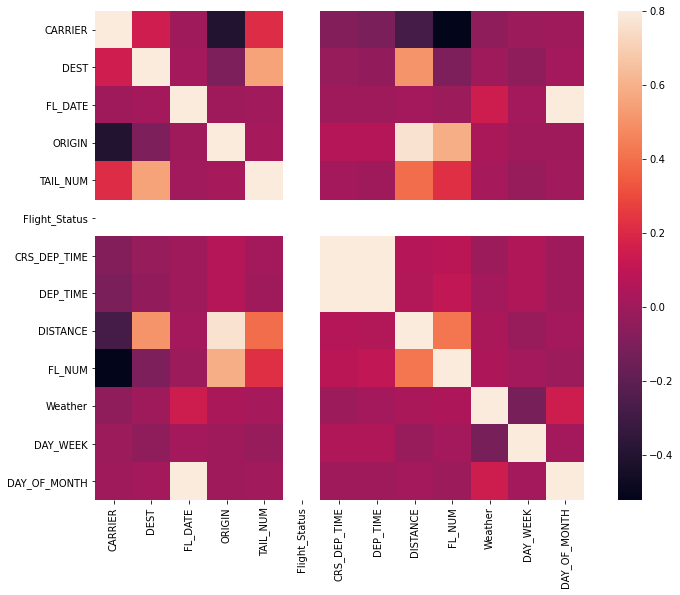

In [12]:
#correlation matrix
corrmat = flights_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

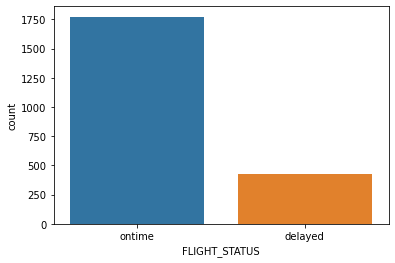

In [15]:
#total no. of delayed and ontime flights

sns.countplot(x="FLIGHT_STATUS", data=f_data)
plt.show()

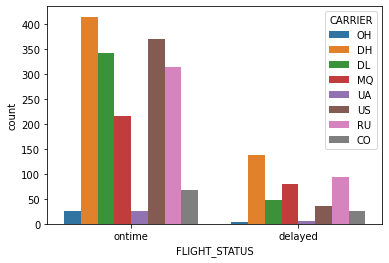

In [16]:
#no. of delayed and ontime flights depending on carrier

sns.countplot(x="FLIGHT_STATUS", hue="CARRIER",data=f_data)
plt.show()

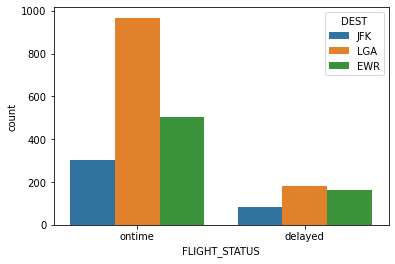

In [17]:
#no. of delayed and ontime flights depending on destination

sns.countplot(x="FLIGHT_STATUS", hue="DEST",data=f_data)
plt.show()

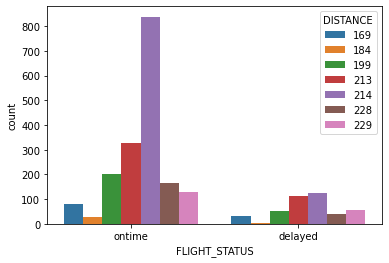

In [18]:
#no. of delayed and ontime flights depending on distance

sns.countplot(x="FLIGHT_STATUS", hue="DISTANCE",data=f_data)
plt.show()

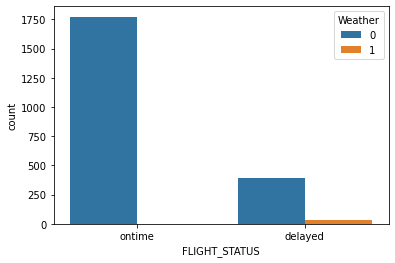

In [19]:
#no. of delayed and ontime flights depending on weather

sns.countplot(x="FLIGHT_STATUS", hue="Weather",data=f_data)
plt.show()

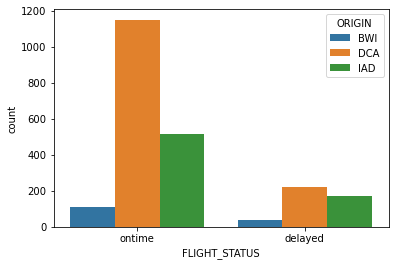

In [20]:
#no. of delayed and ontime flights depending on origin

sns.countplot(x="FLIGHT_STATUS", hue="ORIGIN",data=f_data)
plt.show()

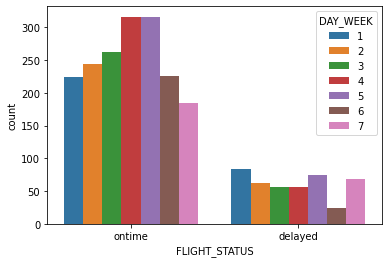

In [21]:
#no. of delayed and ontime flights depending on day of the week

sns.countplot(x="FLIGHT_STATUS", hue="DAY_WEEK",data=f_data)
plt.show()

In [23]:
#find no of delayed flights

Delayedflights = f_data[(f_data["FLIGHT_STATUS"] == "delayed")]
Delayedflights.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS
53,1455,DH,1531,LGA,229,01-02-2004,7211,IAD,0,5,2,N665BR,delayed
56,1039,DH,1236,LGA,229,01-02-2004,7792,IAD,0,5,2,N665BR,delayed
62,2120,DH,2305,JFK,228,01-02-2004,7814,IAD,0,5,2,N657BR,delayed
96,1245,DH,1350,EWR,213,01-02-2004,7303,IAD,0,5,2,N686BR,delayed
97,1430,DH,1512,EWR,213,01-02-2004,7307,IAD,0,5,2,N309UE,delayed


C:\Users\RWaghmare\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


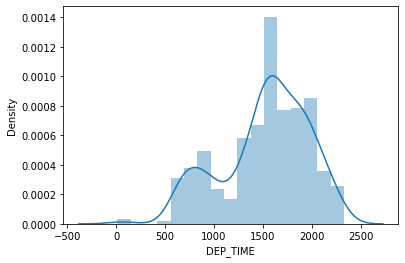

In [24]:
#histogram to find no of delayed flights due to departure time
sns.distplot(Delayedflights['DEP_TIME'])
plt.show()

C:\Users\RWaghmare\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


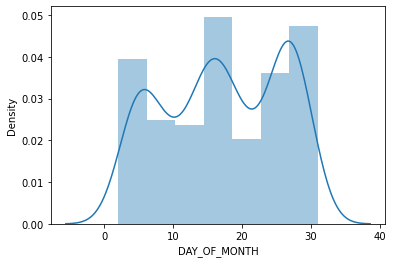

In [25]:
#histogram to find no of delayed flights due to day of the month
sns.distplot(Delayedflights['DAY_OF_MONTH'])
plt.show()

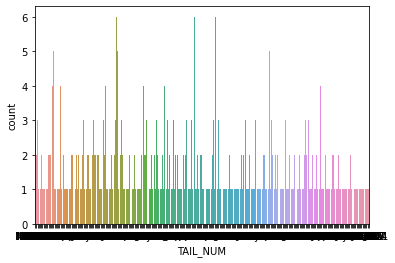

In [26]:
#no. of times a tail number flight is delayed

sns.countplot(x="TAIL_NUM",data=Delayedflights)
plt.show()

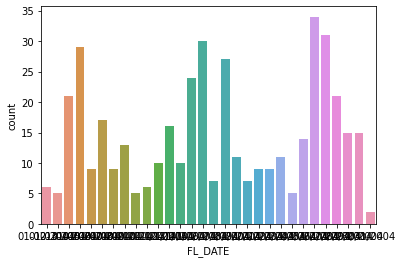

In [27]:
#no. of delayed flights on a particular date

sns.countplot(x="FL_DATE",data=Delayedflights)
plt.show()

C:\Users\RWaghmare\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


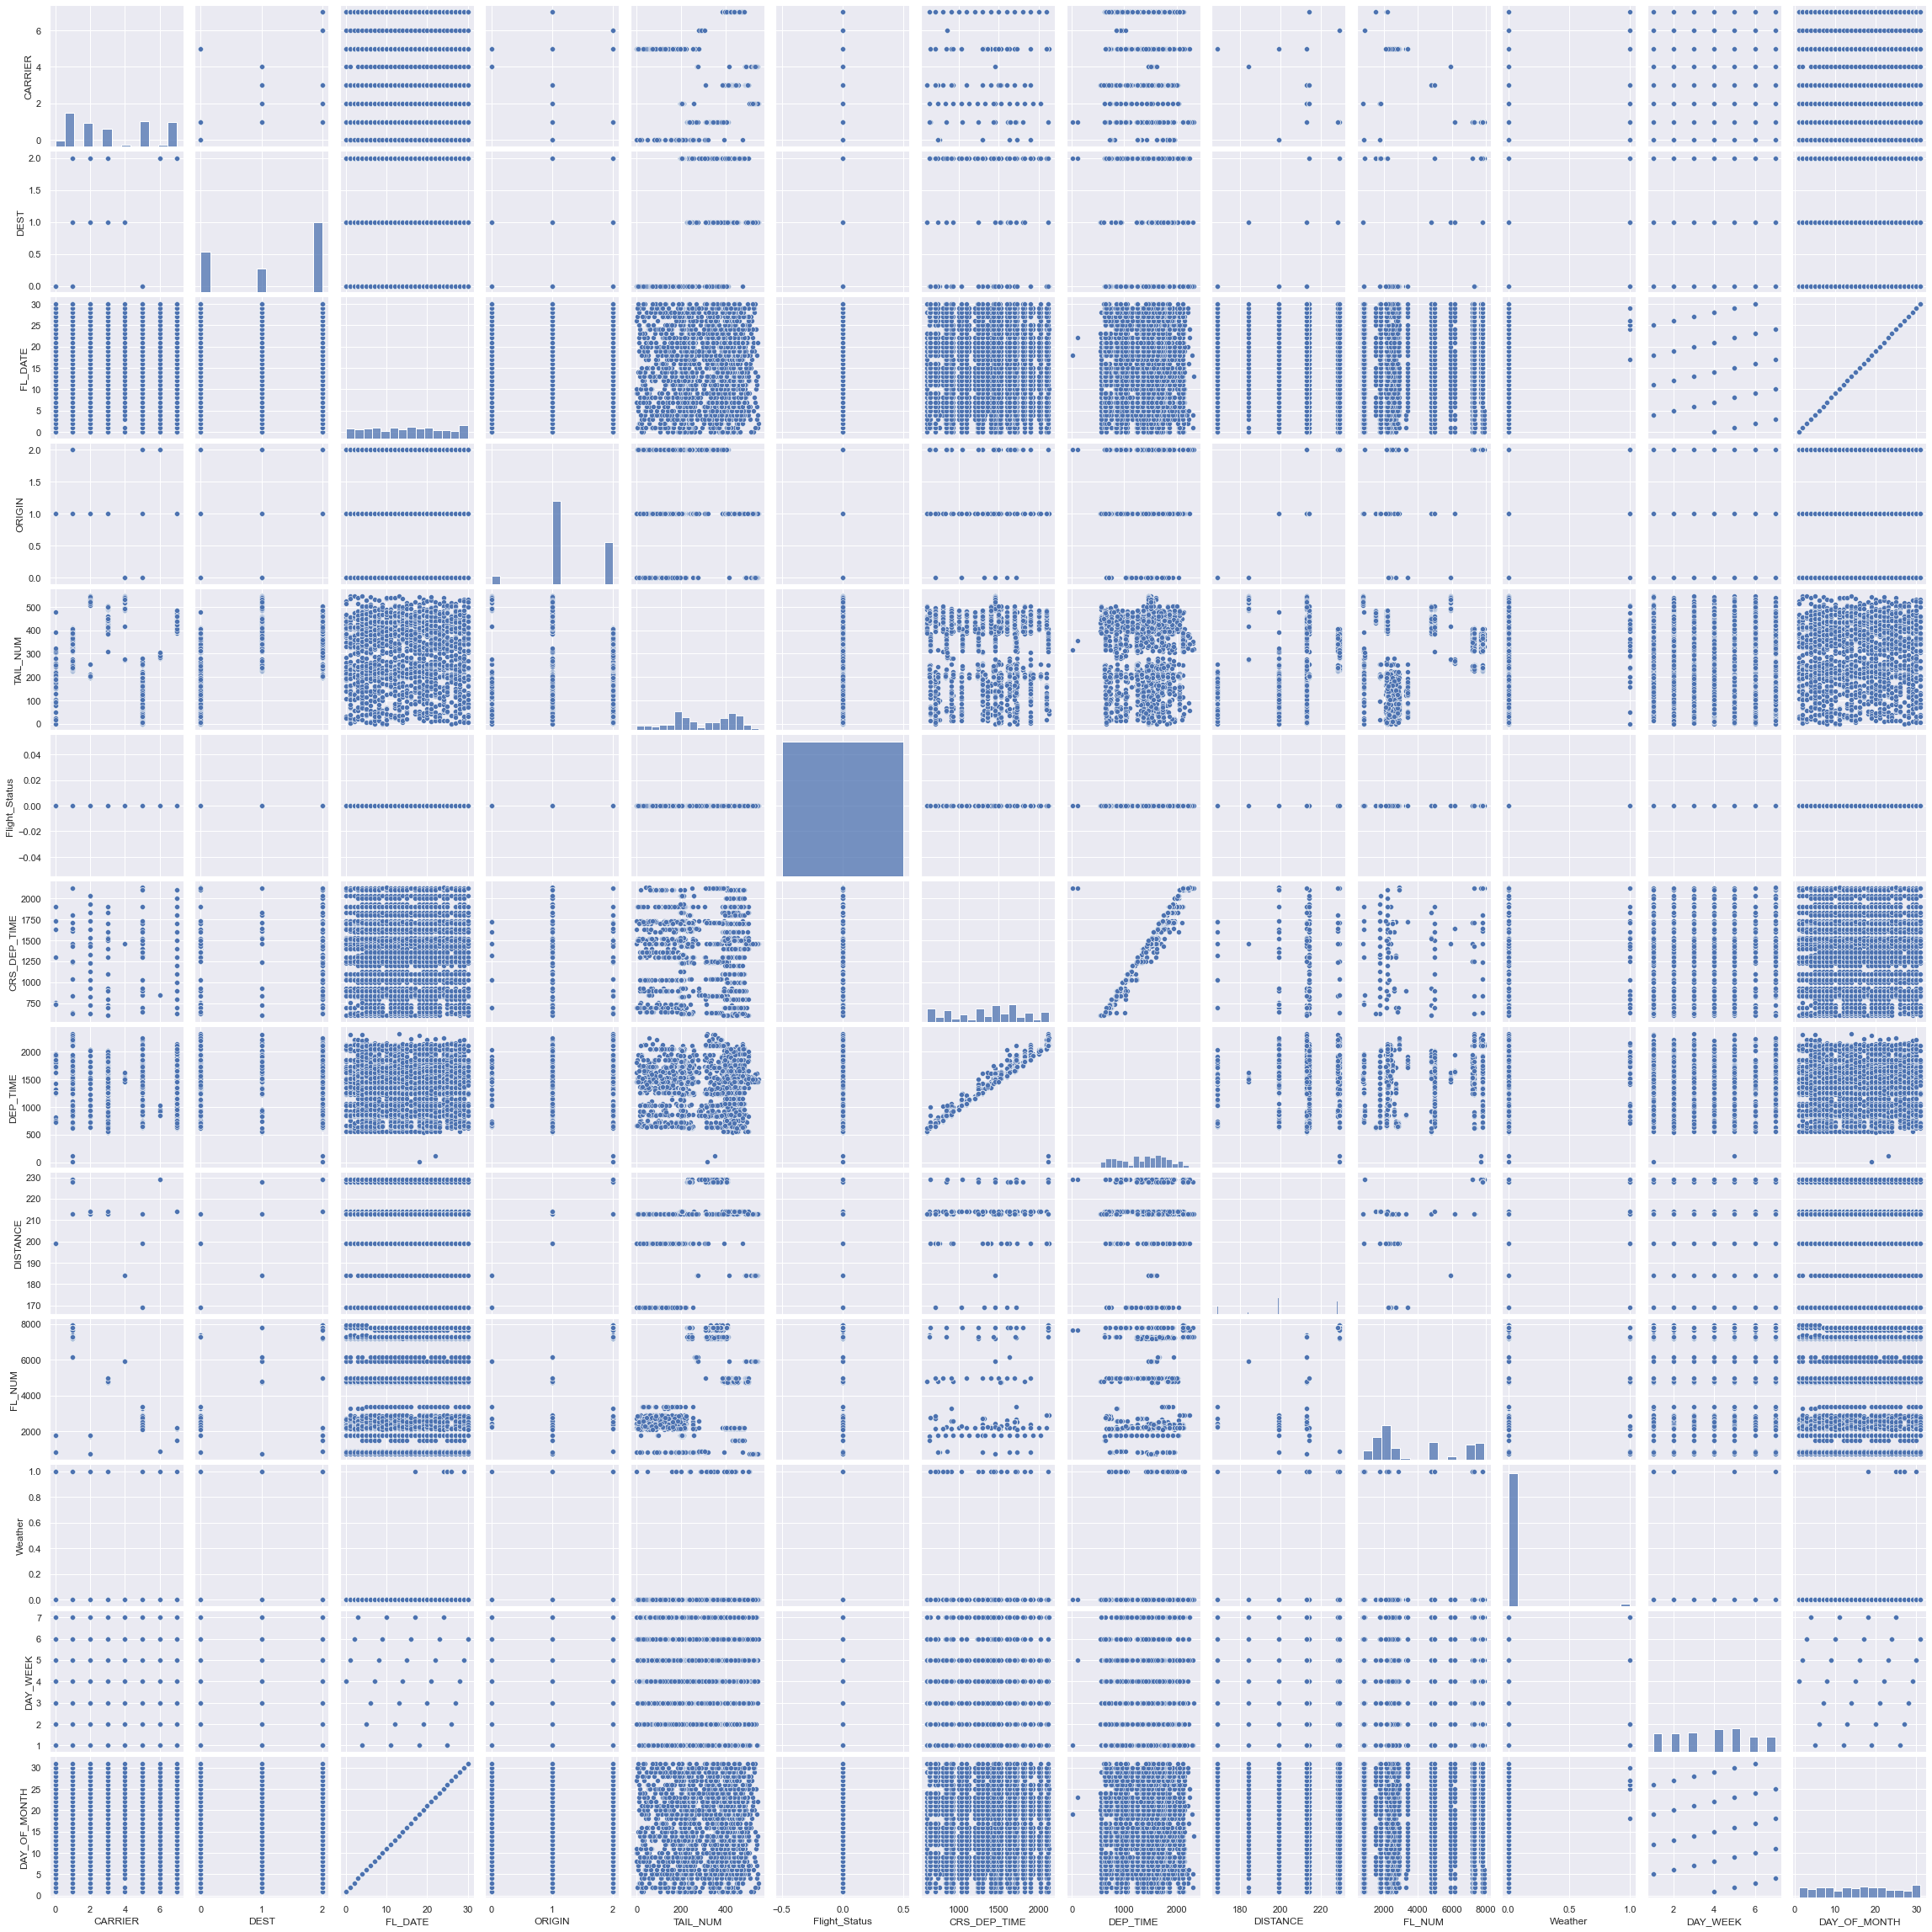

In [28]:

#scatterplot to get relation amongst all the variables
sns.set()
sns.pairplot(flights_df, size = 2.5)
plt.show()

In [31]:
#select dependent and independent variables

X = flights_df.drop({'FLIGHT_STATUS'}, axis=1)
y = flights_df['FLIGHT_STATUS']

# Logistic Regression

In [76]:
#split dataset into train and test data by 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [77]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # print(linear_model)

            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw.astype(float)
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        x=x.astype(float)
        return 1 / (1 + np.exp(-x))

In [78]:
#call Logistic Regression class
regressor = LogisticRegression(learning_rate=0.001, n_iters=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<ipython-input-77-39919c3babde>:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [79]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [80]:
#find accuracy of the model
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [81]:
#accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.81


# Using Logistic regression from sklearn

In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000,random_state = 12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [84]:
#accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.81


In [83]:
from sklearn.metrics import classification_report
print('Classification report:',classification_report(y_test, y_pred))

Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.81      1.00      0.90       359

    accuracy                           0.81       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.66      0.81      0.73       441



C:\Users\RWaghmare\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RWaghmare\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RWaghmare\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
